# Credit Risk Analysis

**Credit Risk**

Resiko yang harus ditanggung oleh seorang individu atau lembaga ketika memberikan pinjaman - biasanya dalam bentuk uang - ke individu atau pihak lain. Resiko ini berupa tidak bisa dibayarkannya pokok dan bunga pinjaman, sehingga mengakibatkan kerugian berikut:

- gangguan aliran kas (cash flow) sehingga modal kerja terganggu.
- meningkatkan biaya operasional untuk mengejar pembayaran tersebut (collection).

Untuk memperkecil resiko kredit ini, biasanya dilakukan proses yang disebut dengan credit scoring dan credit rating terhadap pihak peminjam. Output proses ini akan menjadi basis untuk menentukan apakah aplikasi pengajuan pinjaman baru diterima atau ditolak.



**Credit Score**

Nilai resiko yang diberikan kepada seorang individu atau organisasi yang mengajukan pinjaman berdasarkan rekam jejak pinjaman dan pembayaran yang dilakukan. Proses pemberian credit score ini biasanya disebut sebagai credit scoring.

Perhitungan credit score biasanya dibuat berdasarkan data historis lamanya keterlambatan pembayaran dan yang tidak bayar sama sekali (**bad debt**). Bad debt biasanya mengakibatkan lembaga pemberian kredit harus menyita aset atau melakukan **write off**. Nilai credit score biasanya bervariasi antar lembaga. Namun banyak yang kemudian mengadopsi model FICO Score yang memiliki rentang nilai 300 - 850. Semakin tinggi nilai yang didapatkan, maka semakin baik tingkat kemampuan seseorang atau sebuah lembaga untuk membayar pinjaman.

**Risk Rating**

Kadang banyak lembaga yang menggunakan risk rating atau tingkat resiko. Terbalik dengan credit score, semakin tinggi rating ini menunjukkan resiko yang semakin meningkat.

Selain itu kodifikasi juga dibuat lebih simpel  dibandingkan rentang nilai sehingga keputusan yang bisa diambil lebih cepat. Contoh, misalkan penggunaan kombinasi seperti huruf AAA,  AA+, P-1, dan seterusnya. Atau  untuk banyak internal lembaga peminjam, kategorisasi hanya menggunakan rentang angka yang kecil misalkan 1 sampai dengan 5.

Credit risk adalah resiko yang harus ditanggung oleh seorang individu atau lembaga ketika memberikan pinjaman - biasanya dalam bentuk uang - ke individu atau pihak lain.

Resiko ini berupa tidak bisa dibayarkannya pokok dan bunga pinjaman, sehingga mengakibatkan kerugian berikut:

gangguan aliran kas (cash flow) sehingga modal kerja terganggu.
meningkatkan biaya operasional untuk mengejar pembayaran tersebut (collection).
Credit score dan risk rating adalah dua penilaian yang dilakukan meminimalkan resiko dari pihak pemberi kredit. Karena berdasarkan kedua model penilaian tersebut, akan diputuskan apakah aplikasi peminjaman seseorang disetujui atau ditolak.

## Dataset

Kolom risk_rating ini berelasi langsung dengan kolom overdue_average, atau kolom keterlambatan pembayaran.

Jika keterlambatan sampai dengan 30 hari (0 - 30 days) maka diberikan nilai 1.
keterlambatan 31 sampai dengan 45 hari (31 - 45 days) maka scoring diberikan nilai 2.
dan seterusnya
Dari sini juga beberapa kolom juga diambil oleh analis untuk mencari pola keterkaitannya terhadap rating ini, yaitu:

pendapatan dalam jutaan per tahun (pendapatan_setahun_juta).
durasi pinjaman dalam satuan bulan (durasi_pinjaman_bulan).
jumlah tanggungan (jumlah_tanggungan).
apakah ada kpr aktif atau tidak (kpr_aktif).

**Analisa dan Model Pengambilan Keputusan**

Masih terkait dengan contoh data sebelumnya, namun dengan contoh data utuh - DQLab akan memberikan ilustrasi aktivitas tindak lanjut terhadap data dengan contoh skenario berikut.

Seorang analis akan melakukan penelusuran terhadap data kita untuk mencari pola. Berikut adalah temuannya: 

- Jika jumlah tanggungan berjumlah lebih dari 4, kecenderungan resikonya sangat tinggi (rating 4 dan 5).
- Jika durasi pinjaman semakin lama yaitu lebih dari 24 bulan, maka kecenderungan resiko juga meningkat (rating 4 dan 5).

Dari kedua temuan ini, analis akan membentuk aturan-aturan untuk menuntun pengambilan keputusan (decision making model) terhadap pengajuan pinjaman baru untuk sebagai berikut:

- Jika jumlah tanggungan berjumlah kurang dari 5 orang , dan durasi pinjaman kurang dari 24 bulan maka rating diberikan nilai 2 dan pengajuan pinjaman diterima. 
- Jika jumlah tanggungan berjumlah lebih dari 4 orang dan durasi pinjaman lebih dari 24 bulan maka maka rating diberikan nilai 5 dan pengajuan pinjaman ditolak.
- Jika jumlah tanggungan berjumlah kurang dari 5, dan durasi pinjaman kurang dari 36 bulan maka maka rating diberikan nilai 3 dan diberikan pinjaman. 

Nah, tiga aturan itu kita sebut sebagai model untuk memprediksi nilai risk rating dan menjadi basis pengambilan keputusan terhadap aplikasi pinjaman baru.
Dengan model ini, lembaga pinjaman akan semakin cepat mengambil keputusan dan dengan tingkat kesalahan pengambilan keputusan yang lebih minim.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('https://academy.dqlab.id/dataset/credit_scoring_dqlab.xlsx')
df.head()

,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,AGR-000001,295,YA,48,5,61 - 90 days,4
1,AGR-000011,271,YA,36,5,61 - 90 days,4
2,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,AGR-000043,210,YA,12,3,46 - 60 days,3
4,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   kode_kontrak             900 non-null    object
 1   pendapatan_setahun_juta  900 non-null    int64 
 2   kpr_aktif                900 non-null    object
 3   durasi_pinjaman_bulan    900 non-null    int64 
 4   jumlah_tanggungan        900 non-null    int64 
 5   rata_rata_overdue        900 non-null    object
 6   risk_rating              900 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 49.3+ KB


In [ ]:
df.describe()

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
count,900.000000,900.000000,900.000000,900.000000
mean,163.318889,29.933333,2.932222,2.681111
std,51.863210,13.671988,2.007457,1.294928
min,70.000000,12.000000,0.000000,1.000000
25%,121.000000,12.000000,1.000000,1.000000
50%,162.000000,24.000000,3.000000,3.000000
75%,199.000000,48.000000,5.000000,3.000000
max,300.000000,48.000000,6.000000,5.000000


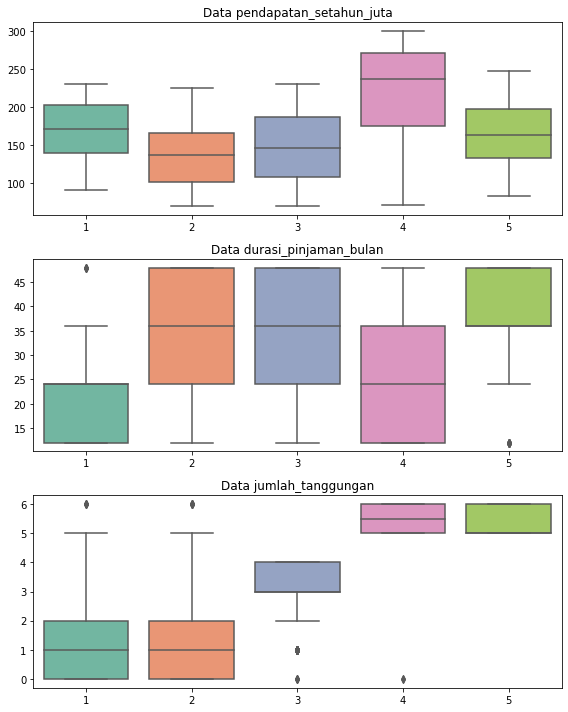

In [ ]:
fig, axes = plt.subplots(nrows=3, figsize=(8,10))
for col, ax in zip(df.select_dtypes(exclude=['object']).columns[:-1], axes):
  sns.boxplot(x=df['risk_rating'], y=df[col], palette='Set2',ax=ax)
  ax.set_title('Data ' + col)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout()
plt.show()


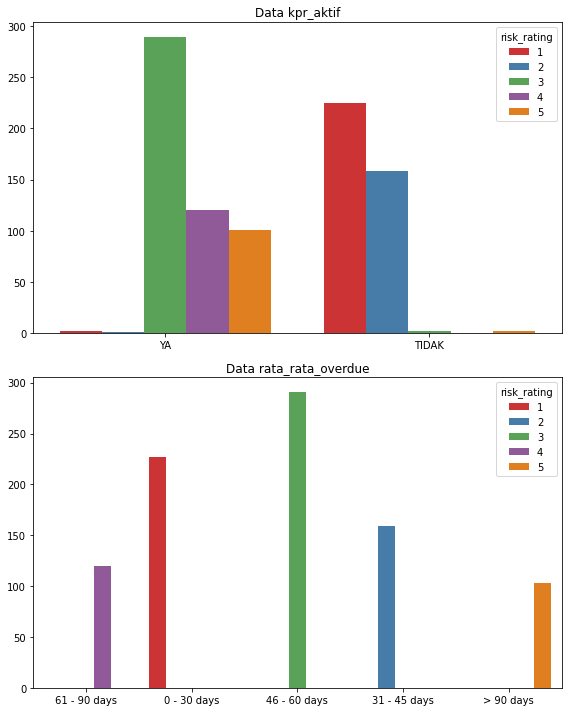

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(8,10))
for col, ax in zip(df.select_dtypes(include=['object']).columns[1:], axes):
  sns.countplot(x=df[col], hue=df['risk_rating'], palette='Set1', ax=ax)
  ax.set_title('Data ' + col)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
df_prep = df.copy()
for col in df_prep.select_dtypes(include=['object']).columns[1:]:
  lb = LabelEncoder()
  df_prep[col] = lb.fit_transform(df_prep[col])
  print(df_prep[col].head())
  print('\n')

0    1
1    1
2    0
3    1
4    0
Name: kpr_aktif, dtype: int64


0    3
1    3
2    0
3    2
4    1
Name: rata_rata_overdue, dtype: int64




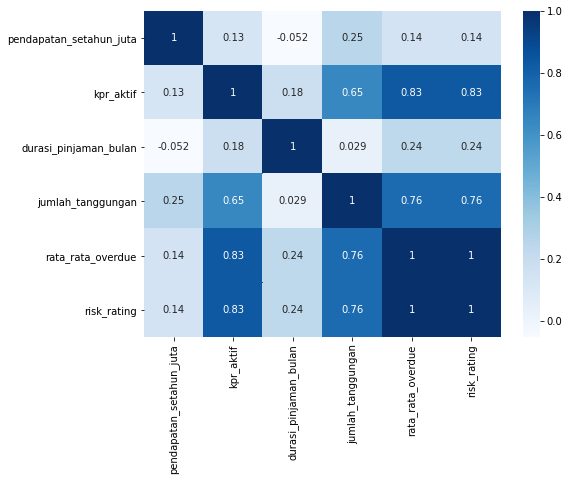

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_prep.corr(), annot=True, cmap='Blues')
plt.show()

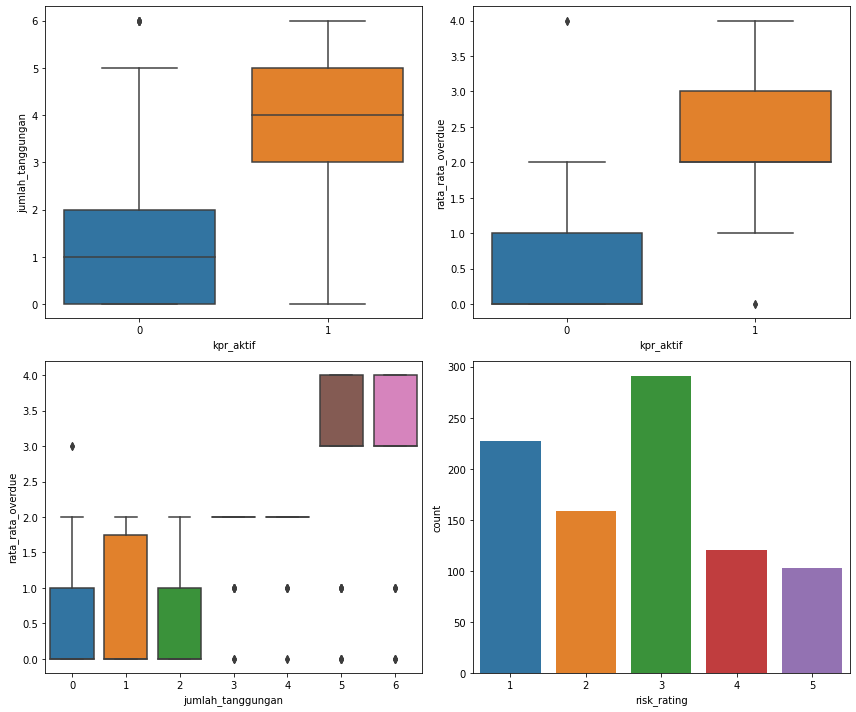

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.boxplot(x = df_prep['kpr_aktif'], y = df_prep['jumlah_tanggungan'])
plt.subplot(222)
sns.boxplot(x = df_prep['kpr_aktif'], y = df_prep['rata_rata_overdue'])
plt.subplot(223)
sns.boxplot(x = df_prep['jumlah_tanggungan'], y = df_prep['rata_rata_overdue'])
plt.subplot(224)
sns.countplot(df_prep['risk_rating'])

plt.tight_layout()
plt.show()

In [ ]:
df_prep.head()

,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,AGR-000001,295,1,48,5,3,4
1,AGR-000011,271,1,36,5,3,4
2,AGR-000030,159,0,12,0,0,1
3,AGR-000043,210,1,12,3,2,3
4,AGR-000049,165,0,36,0,1,2


Decision tree adalah struktur model untuk pengambilan keputusan dimana kita mengikuti alur dari suatu titik awal (yang disebut root node), kondisi-kondisi berikutnya, sampai mencapai kesimpulan.

Komponen-komponen dari decision tree ini adalah sebagai berikut:

Root node
Branch atau split
Node
Leaf node
Ini adalah model output yang cocok dihasilkan para analis untuk membantu mengidentifikasi risk rating. Dan beruntungnya, model ini bisa otomatis dihasilkan dari algoritma machine learning dengan input data historis credit

In [ ]:
X = df_prep.drop('kode_kontrak', axis=1)
y = df_prep['risk_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dc = DecisionTreeClassifier(criterion='entropy')
model_DC = dc.fit(X_train, y_train)
pred_DC = model_DC.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, accuracy_score

print(y_test[:5].values)
print(pred_DC[:5])
print(accuracy_score(y_test, pred_DC))

[1 1 1 3 2]
[1 1 1 3 2]
1.0


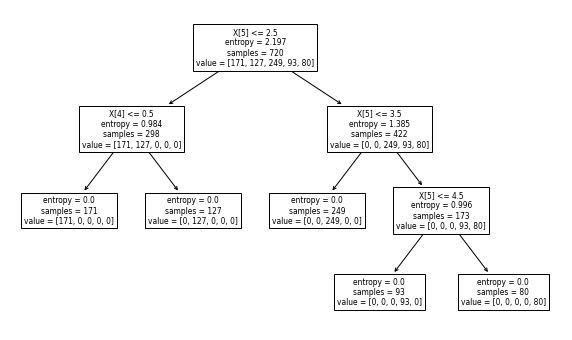

In [ ]:
plt.figure(figsize=(10,6))
plot_tree(model_DC)
plt.show()